======original=======


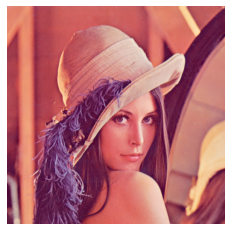

======original+noise=======


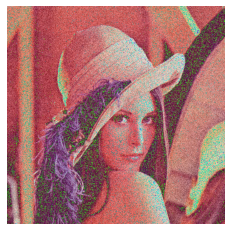

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def make_noise(shape, mode = 'gauss', mean=0, std= 25):
    noise = None
    n = shape[0]
    m = shape[1]
    c = shape[2]
    if mode == 'uniform':
        noise = np.ones(shape=(n,m))
        noise/=(n*m)
    elif mode == 'gauss':
        noise= np.random.normal(mean, std, size = (n,m)) # generate gaussian noise
    else:
        raise Exception('그딴 mode 없음')
    
    noise = np.repeat(noise[:,:,np.newaxis], c, axis=2).astype(np.uint8)
    return noise


print('======original=======')
original_img = Image.open('lena.bmp')
img = np.array(original_img)
if len(img.shape)==2:
    img = np.expand_dims(img,axis=2)
    plt.imshow(original_img, cmap='gray'), plt.axis('off')
    plt.show()
else:
    plt.imshow(original_img), plt.axis('off')
    plt.show()
    
print('======original+noise=======')

noise = make_noise(img.shape)
img = img+noise
img = np.squeeze(img)

if len(img.shape)==2:
    img = Image.fromarray(img)
    plt.imshow(original_img, cmap='gray'), plt.axis('off')
    plt.show()
else:
    img = Image.fromarray(img)
    plt.imshow(img), plt.axis('off')
    plt.show()


======original=======


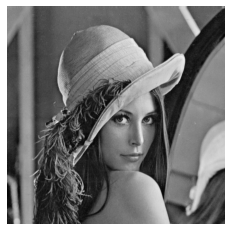

======original+noise=======


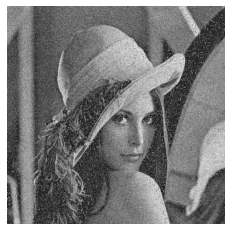

=======metric=====
MSE -> 91.92506027221646 	 PSNR -> 65.61553407451554


In [10]:
def metric(img1,img2, MAX = 255):
    if img1.shape != img2.shape:
        raise Exception('shape 맞춰주세용')
    
    ### 직관적으로 보기위해 H,W,C -> C,H,W
    
    output = np.transpose(img1,(2,0,1))
    target = np.transpose(img2,(2,0,1))
    
    height = img1.shape[0]
    width = img1.shape[1]
    channel = img1.shape[2]
    mse = 0
    for c in range(channel):
        mse += ((output[c,:,:]-target[c,:,:])**2).sum()
    
    mse= mse/(height*width*channel + 1e-9)
    psnr = 10 * np.log((MAX**2)/(mse+1e-9))
    return mse, psnr
    

print('======original=======')
original_img = Image.open('lena_grey.bmp')
img = np.array(original_img)
if len(img.shape)==2:
    img = np.expand_dims(img,axis=2)
    plt.imshow(original_img, cmap='gray'), plt.axis('off')
    plt.show()
else:
    plt.imshow(original_img), plt.axis('off')
    plt.show()
    
print('======original+noise=======')

noise = make_noise(img.shape)
noise_img = img+noise
mse, psnr = metric(img, noise_img)
noise_img = np.squeeze(noise_img)

if len(noise_img.shape)==2:
    noise_img = Image.fromarray(noise_img)
    plt.imshow(noise_img, cmap='gray'), plt.axis('off')
    plt.show()
else:
    
    noise_img = Image.fromarray(noise_img)
    plt.imshow(noise_img), plt.axis('off')
    plt.show()

print('=======metric=====')
print('MSE -> {} \t PSNR -> {}'.format(mse,psnr))

In [5]:
import cv2

def generate_filter(k,mean = 0, std=25):
    if k%2==0:
        raise Exception('짝수 안돼용')
    size = (k,k)
    gauss_filter = np.zeros(size)
    mid = (k-1)//2
    
    # mean = 0 이라 가정
    
    for i in range(k):
        for j in range(k):
            gauss_filter[i,j] = np.exp(-((((i-mid)**2) + ((j-mid)**2))/(2*(std**2))))
    K = gauss_filter.sum()
    
    return gauss_filter/K

print(generate_filter(3))


[[0.11105185 0.11114073 0.11105185]
 [0.11114073 0.11122968 0.11114073]
 [0.11105185 0.11114073 0.11105185]]


======original=======
original_img shape : (512, 512, 3)


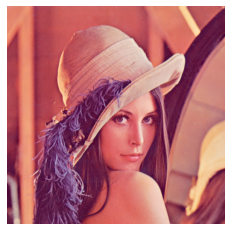

======padding=======
pad_img shape : (532, 532, 3)


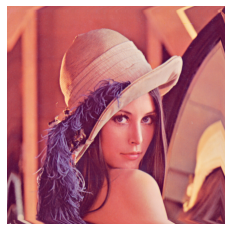

In [6]:
def padding(img,P):
    
    #def generate_matrix(i,j,p,arr):
        # i-p ~ i+p
    N = img.shape[0]
    channel  = img.shape[2]
    size = (N+2*P, N+2*P,channel)
    result = -np.ones(size)
    result[P:N+P,P:N+P,:] = img[:,:,:]
    dy = [0,-1,1,0,1,-1,1,-1]
    dx = [-1,0,0,-1,1,-1,-1,1]
    for y in range(P,N+P):
        for x in range(P,N+P):
            if y==P or y==N+P-1 or x==P or x==N+P-1:
                for k in range(1,P+1):
                    for i in range(8):
                        ny = y + dy[i]*k
                        nx = x + dx[i]*k
                        for c in range(channel):
                            if result[ny][nx][c]==-1:
                                result[ny][nx][c] = result[ny-2*dy[i]*k][nx-2*dx[i]*k][c]
                                

    return result
    


print('======original=======')
original_img = Image.open('lena.bmp')
img = np.array(original_img)

if len(img.shape)==2:
    print('original_img shape : {}'.format(img.shape))
    img = np.expand_dims(img,axis=2)
    plt.imshow(original_img, cmap='gray'), plt.axis('off')
    plt.show()
else:
    print('original_img shape : {}'.format(img.shape))
    plt.imshow(original_img), plt.axis('off')
    plt.show()
    
print('======padding=======')
P=10
pad_img = padding(img,P)
pad_img = np.squeeze(pad_img)

if len(pad_img.shape)==2:
    print('pad_img shape : {}'.format(pad_img.shape))
    pad_img = Image.fromarray(pad_img)
    plt.imshow(pad_img, cmap='gray'), plt.axis('off')
    plt.show()
else:
    print('pad_img shape : {}'.format(pad_img.shape))
    pad_img = Image.fromarray(pad_img.astype(np.uint8))
    plt.imshow(pad_img), plt.axis('off')
    plt.show()


    

======original=======
original_img shape : (512, 512)


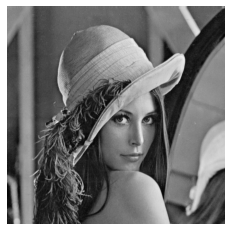

======solution=======
filter size -> (3, 3, 1)
result_img shape : (512, 512, 1)


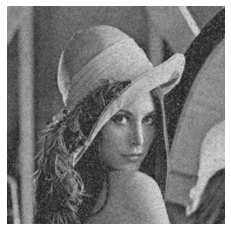

MSE -> 161.99316501864178 	 PSNR -> 59.949729472113226


In [9]:
from PIL import Image
import matplotlib.pyplot as plt

def solution(img, K):
    N = img.shape[0]
    channel = img.shape[2]
    filters = generate_filter(K)
    filters = np.repeat(filters[:,:,np.newaxis],channel,axis=2)
    print('filter size -> {}'.format(filters.shape))
    result = np.zeros((N-(K-1),N-(K-1),channel))
    
    
    for i in range(N-(K-1)):
        for j in range(N-(K-1)):
            for c in range(channel):
                result[i,j,c]+=(np.sum(np.multiply(img[i:i+K,j:j+K,c], filters[:,:,c])))
    return result




print('======original=======')
original_img = Image.open('lena_grey.bmp')
img = np.array(original_img)

if len(img.shape)==2:
    print('original_img shape : {}'.format(img.shape))
    img = np.expand_dims(img,axis=2)
    plt.imshow(original_img, cmap='gray'), plt.axis('off')
    plt.show()
else:
    print('original_img shape : {}'.format(img.shape))
    plt.imshow(original_img), plt.axis('off')
    plt.show()

print('======solution=======')

K=3
P = (K-1)//2
noise = make_noise(img.shape)
noise_img = img+noise
pad_img = padding(noise_img,P)

result_img = solution(pad_img,K)

print('result_img shape : {}'.format(result_img.shape))
mse, psnr = metric(img, result_img)
result_img = np.squeeze(result_img)

if len(result_img.shape)==2:
    result_img = Image.fromarray(result_img)
    plt.imshow(result_img, cmap='gray'), plt.axis('off')
    plt.show()
else:
    result_img = Image.fromarray(result_img.astype(np.uint8))
    plt.imshow(result_img), plt.axis('off')
    plt.show()
    
print('MSE -> {} \t PSNR -> {}'.format(mse,psnr))

In [ ]:
print(pad_img.shape)

In [ ]:
original_img_array.shape